# Regressão Linear Múltipla

Esse código tem como objetivo utilizar o método de regressão simples para prever resultados de consumo de combustível, além de analisar e comparar com os resultados de uma regressão linear simples. A base de dados utilizada foi o dataset público auto-mpg.

#### Passo 0: Import Libs

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

import warnings
warnings.filterwarnings('ignore')

#### Passo 1: Aberura dos dados 

In [25]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data = pd.read_csv('data_auto-mpg.csv') 

data = data[data.horsepower != '?']
data.horsepower = data.horsepower.astype(float)
data = data.rename(columns={"model year": "year", "car name": "car_name"})

In [6]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


#### Passo 2: Alguns plots

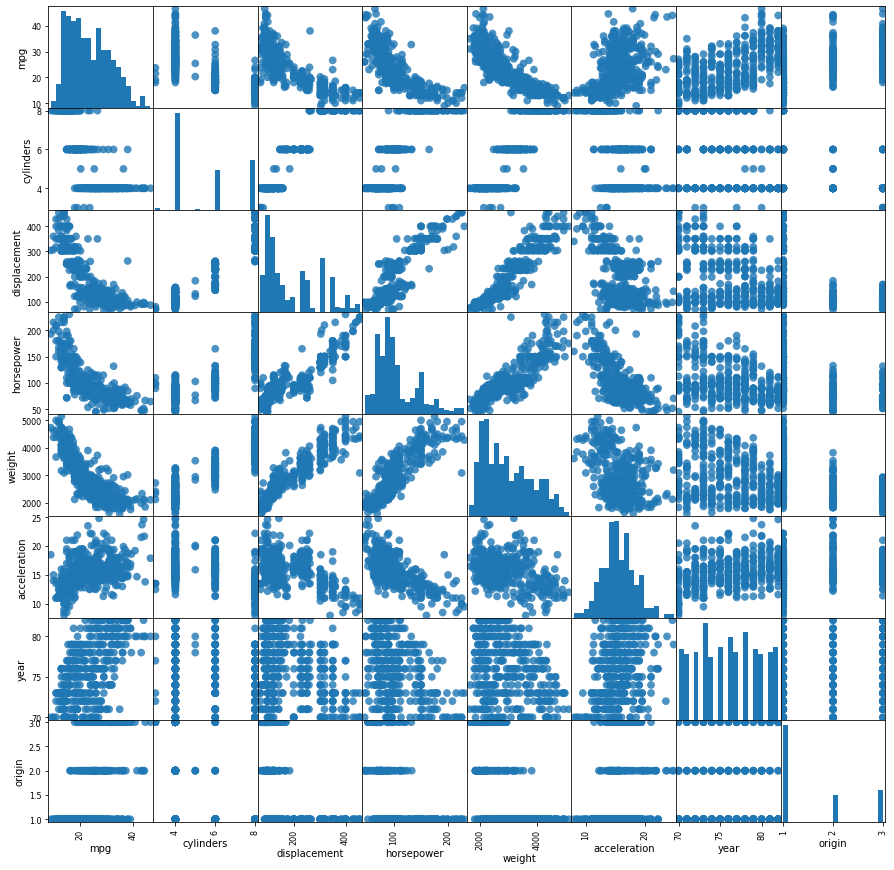

In [9]:
grr = pd.plotting.scatter_matrix(data,figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)


In [10]:
print(data.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

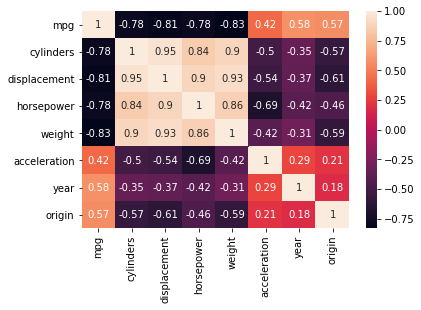

In [11]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Pelos dados de correlação mostrados acima, vimos que existem variáveis correlacionadas, o que dificulta a interpretação e diminui a acurácia do modelo. Abaixo, identificaremos correlações por meio do fator de inflação da variável (VIF), o qual permite identificar multicolinearidade.

In [14]:
data = data._get_numeric_data() 
features = "+".join(data.columns)
y, X = dmatrices('mpg~' + features, data, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,790.9,Intercept
1,5.6,mpg
2,10.8,cylinders
3,22.2,displacement
4,10.0,horsepower
5,13.6,weight
6,2.6,acceleration
7,1.9,year
8,1.9,origin


#### Passo 2: Aplicando regressão

In [13]:
X = data[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]
Y = data[['mpg']]

X_ols = sm.add_constant(X) # adding a constant (intercept)
model = sm.OLS(Y, X_ols).fit()
predictions = model.predict(X_ols) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 02 Feb 2021   Prob (F-statistic):          2.04e-139
Time:                        12:48:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos pelos resultados que existe uma relação entre os preditores e a resposta. Em uma regressão múltipla, é mais vantajoso olhar o p-valor de cada variável, em vez de olhar o R², pois podemos verificar se a variável é significante para o modelo.
No caso, todas os preditores são estatiticamente significantes, com excessão do cylinders, horsepower e acceleration.
Interessante notar que, em uma regressão simples do mpg vs horsepower, horsepower é significante. Mas quando interimos
os outros preditores, ele torna-se insignificante. Isso pode acontecer já que é uma variável correlacionada com 
alguns preditores.

O coeficiente do model year é 0,75. Isso significa que os modelos de carro mais modernos tem maior mpg.Para cada ano que passa, há um aumento de 0,75 unidades de mpg.

Abaixo, vamos verificar o modelo apenas com as variáveis significativas:

In [23]:
X = data[[ 'displacement','weight', 'year', 'origin']]
Y = data[['mpg']]

X_ols = sm.add_constant(X) # adding a constant (intercept)
model = sm.OLS(Y, X_ols).fit()
predictions = model.predict(X_ols) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     435.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):          9.57e-142
Time:                        20:23:19   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.6065      4.028     -4.620      0.000     -26.526     -10.687
displacement     0.0056      0.005      1.172      0.242      -0.004       0.015
weight          -0.0066      0.001    -11.802      0.000      -0.008      -0.005
year             0.7714      0.050     15.486      0.000       0.673       0.869
origin           1.2262      0.267      4.593      0.000       0.701       1.751
==============================================================================
Omnibus:                       37.960   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.311
Skew:                           0.562   Prob(JB):                     1.20e-16
Kurtosis:                       4.796   Cond. No.                     7.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Passo 3: Olhando os resíduos

In [30]:
influence = model.get_influence()
student_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag

Text(0, 0.5, 'Studentized Residuals')

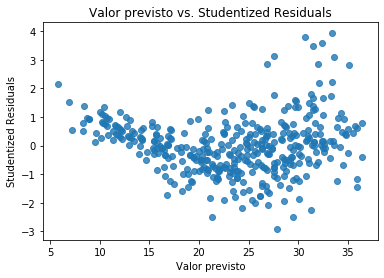

In [31]:
sns.regplot(predictions, model.resid_pearson,  fit_reg=False)
plt.title('Valor previsto vs. Studentized Residuals')
plt.xlabel('Valor previsto')
plt.ylabel('Studentized Residuals')

Text(0, 0.5, 'Studentized Residuals')

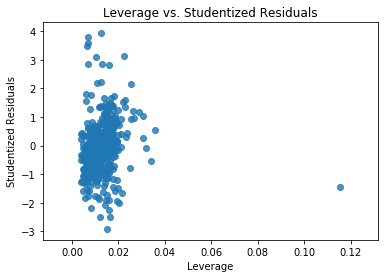

In [32]:
sns.regplot(leverage, model.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

Pela análise dos resíduos, vimos que existem alguns outliers e apenas um ponto de alta alavancagem.
Vimos também que a relação da resposta com os preditores não parece linear, mesmo adicionando outras variáveis.